<a href="https://colab.research.google.com/github/sonupatel24/Brain_Tumor_MRI_CNN_Model/blob/main/Brain_Tumor_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 65% 96.0M/149M [00:00<00:00, 996MB/s]
100% 149M/149M [00:00<00:00, 655MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an image data generator (with simple normalization)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_ds = datagen.flow_from_directory(
    '/content/Training',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_ds = datagen.flow_from_directory(
    '/content/Testing',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 4571 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


In [ ]:
print(train_ds.class_indices)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
import numpy as np
import pandas as pd

# Get unique labels and their counts using numpy
unique_labels, counts = np.unique(train_ds.labels, return_counts=True)

# Create a dictionary or pandas Series for better readability
data_balance = dict(zip(unique_labels, counts))
# or
# data_balance = pd.Series(counts, index=unique_labels)

print(data_balance)

{np.int32(0): np.int64(1057), np.int32(1): np.int64(1072), np.int32(2): np.int64(1276), np.int32(3): np.int64(1166)}


In [ ]:
def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


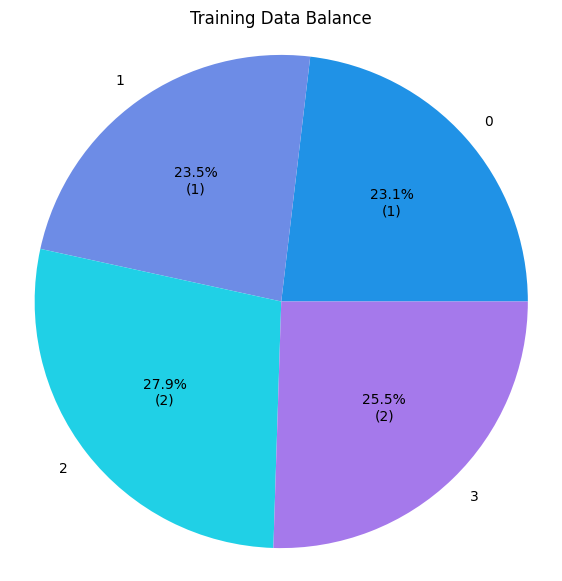

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(
    data_balance.values(), # Use values from the dictionary for the pie slices
    labels=data_balance.keys(), # Use keys from the dictionary for labels
    autopct=custom_autopct,
    colors=["#2092E6", "#6D8CE6", "#20D0E6", "#A579EB"]
)
plt.title("Training Data Balance")
plt.axis("equal")
plt.show()

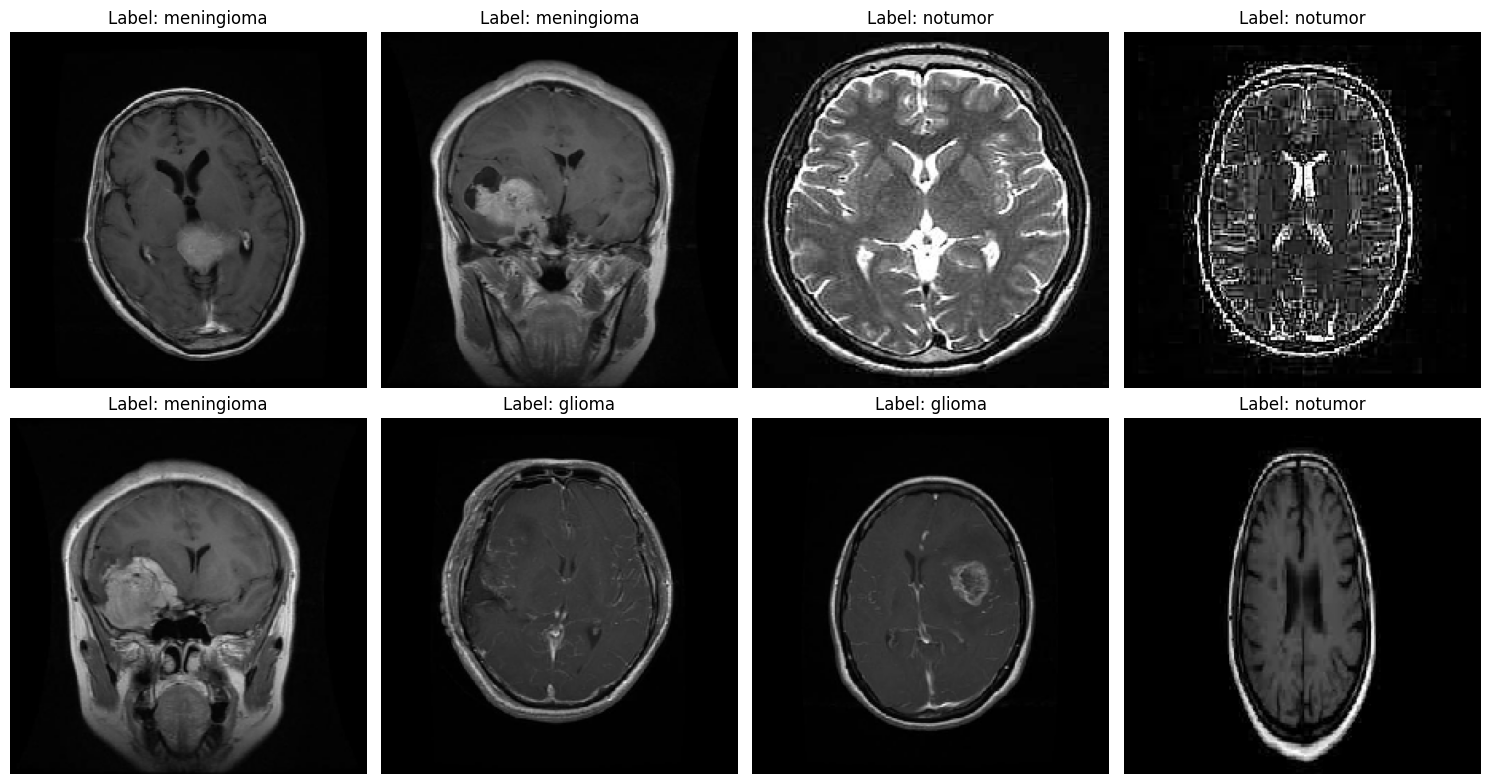

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
images, labels = next(train_ds)

# Define class labels (auto-extracted from generator)
class_labels = list(train_ds.class_indices.keys())

# Number of images to show
num_samples = 8
plt.figure(figsize=(15, 8))

for i in range(num_samples):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {class_labels[np.argmax(labels[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
class_count = len(train_ds.class_indices)
print("Number of classes:", class_count)


Number of classes: 4


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Image and model config
img_size = (224,224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
batch_size = 16


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
BatchNormalization()
model.add(MaxPooling2D())


model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
BatchNormalization()
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(class_count, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,866,724 (49.08 MB)

 Trainable params: 12,866,724 (49.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10  # number of all epochs in training

history = model.fit(train_ds, epochs= epochs, verbose= 1, validation_data= val_ds, shuffle= False)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.6347 - loss: 0.8417 - val_accuracy: 0.6374 - val_loss: 1.1371
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8605 - loss: 0.3658 - val_accuracy: 0.6565 - val_loss: 0.8196
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9208 - loss: 0.2335 - val_accuracy: 0.7901 - val_loss: 0.6431
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9456 - loss: 0.1607 - val_accuracy: 0.7863 - val_loss: 0.7876
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9654 - loss: 0.1100 - val_accuracy: 0.8015 - val_loss: 0.8565
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9747 - loss: 0.0804 - val_accuracy: 0.7634 - val_loss: 0.8836
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9871 - loss: 0.0520 - val_accuracy: 0.8130 - val_loss: 0.8287
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9909 - loss: 0.0344 - 

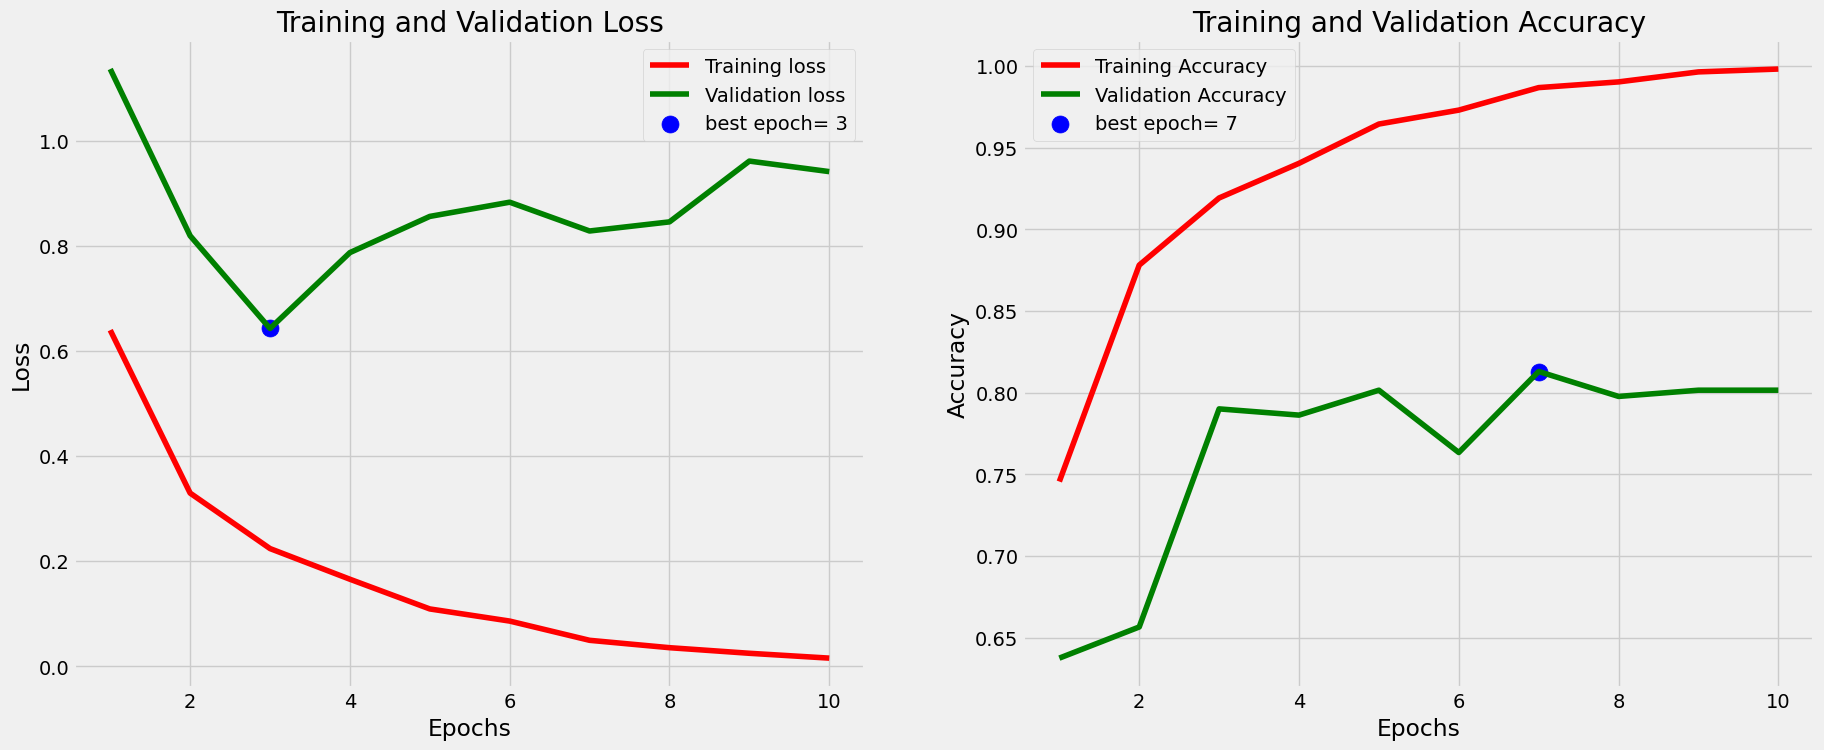

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
# Create a new MLP model
model2 = Sequential([
    Flatten(input_shape=img_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(class_count, activation='softmax')
])

model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(train_ds, epochs=epochs, verbose=1, validation_data=val_ds, shuffle=False)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.5697 - loss: 1.0830 - val_accuracy: 0.6374 - val_loss: 1.2787
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.7966 - loss: 0.5322 - val_accuracy: 0.6031 - val_loss: 1.1573
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8355 - loss: 0.4330 - val_accuracy: 0.6870 - val_loss: 0.9758
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8751 - loss: 0.3249 - val_accuracy: 0.6641 - val_loss: 1.1232
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9085 - loss: 0.2721 - val_accuracy: 0.6870 - val_loss: 1.4268
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9071 - loss: 0.2723 - val_accuracy: 0.7176 - val_loss: 0.9060
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9335 - loss: 0.1950 - val_accuracy: 0.7137 - val_loss: 1.5316
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9269 - loss: 0.2025 - val_accuracy

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,174 (147.25 MB)

 Trainable params: 12,866,724 (49.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,733,450 (98.17 MB)

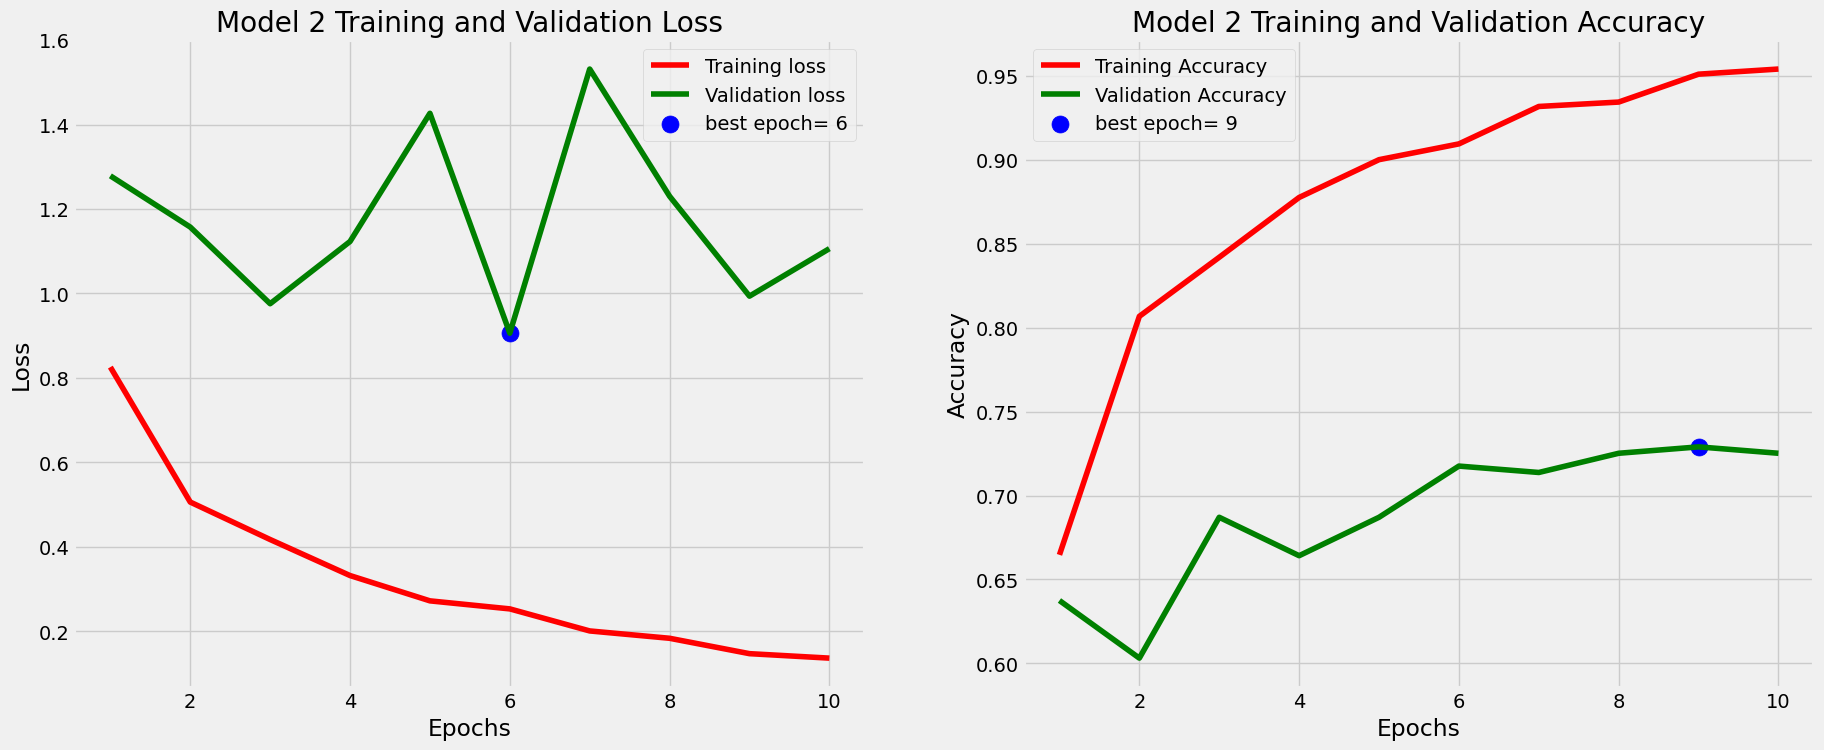

In [ ]:
# prompt: code for graph for model2

import matplotlib.pyplot as plt
import numpy as np
# Define needed variables for model2
tr_acc2 = history2.history['accuracy']
tr_loss2 = history2.history['loss']
val_acc2 = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']
index_loss2 = np.argmin(val_loss2)
val_lowest2 = val_loss2[index_loss2]
index_acc2 = np.argmax(val_acc2)
acc_highest2 = val_acc2[index_acc2]

Epochs2 = [i+1 for i in range(len(tr_acc2))]
loss_label2 = f'best epoch= {str(index_loss2 + 1)}'
acc_label2 = f'best epoch= {str(index_acc2 + 1)}'

# Plot training history for model2
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs2, tr_loss2, 'r', label= 'Training loss')
plt.plot(Epochs2, val_loss2, 'g', label= 'Validation loss')
plt.scatter(index_loss2 + 1, val_lowest2, s= 150, c= 'blue', label= loss_label2)
plt.title('Model 2 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs2, tr_acc2, 'r', label= 'Training Accuracy')
plt.plot(Epochs2, val_acc2, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc2 + 1 , acc_highest2, s= 150, c= 'blue', label= acc_label2)
plt.title('Model 2 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without the top (fully connected) layers
vgg_base = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=img_shape)

# Freeze the VGG16 base model
vgg_base.trainable = False

# Create a new model on top of the VGG16 base
model3 = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(class_count, activation='softmax')
])

model3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(train_ds, epochs=epochs, verbose=1, validation_data=val_ds, shuffle=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.7608 - loss: 0.6001 - val_accuracy: 0.6947 - val_loss: 0.9519
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 64s 107ms/step - accuracy: 0.9268 - loss: 0.1966 - val_accuracy: 0.7939 - val_loss: 0.6455
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 32s 111ms/step - accuracy: 0.9583 - loss: 0.1229 - val_accuracy: 0.8130 - val_loss: 0.5338
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9784 - loss: 0.0750 - val_accuracy: 0.8511 - val_loss: 0.5210
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.8626 - val_loss: 0.5608
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 105ms/step - accuracy: 0.9889 - loss: 0.0416 - val_accuracy: 0.8779 - val_loss: 0.5004
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.9958 - loss: 0.0260 - val_accuracy: 0.8588 - val_loss: 0.5187
Epoch 8/10
286/286 ━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,174 (147.25 MB)

 Trainable params: 12,866,724 (49.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,733,450 (98.17 MB)

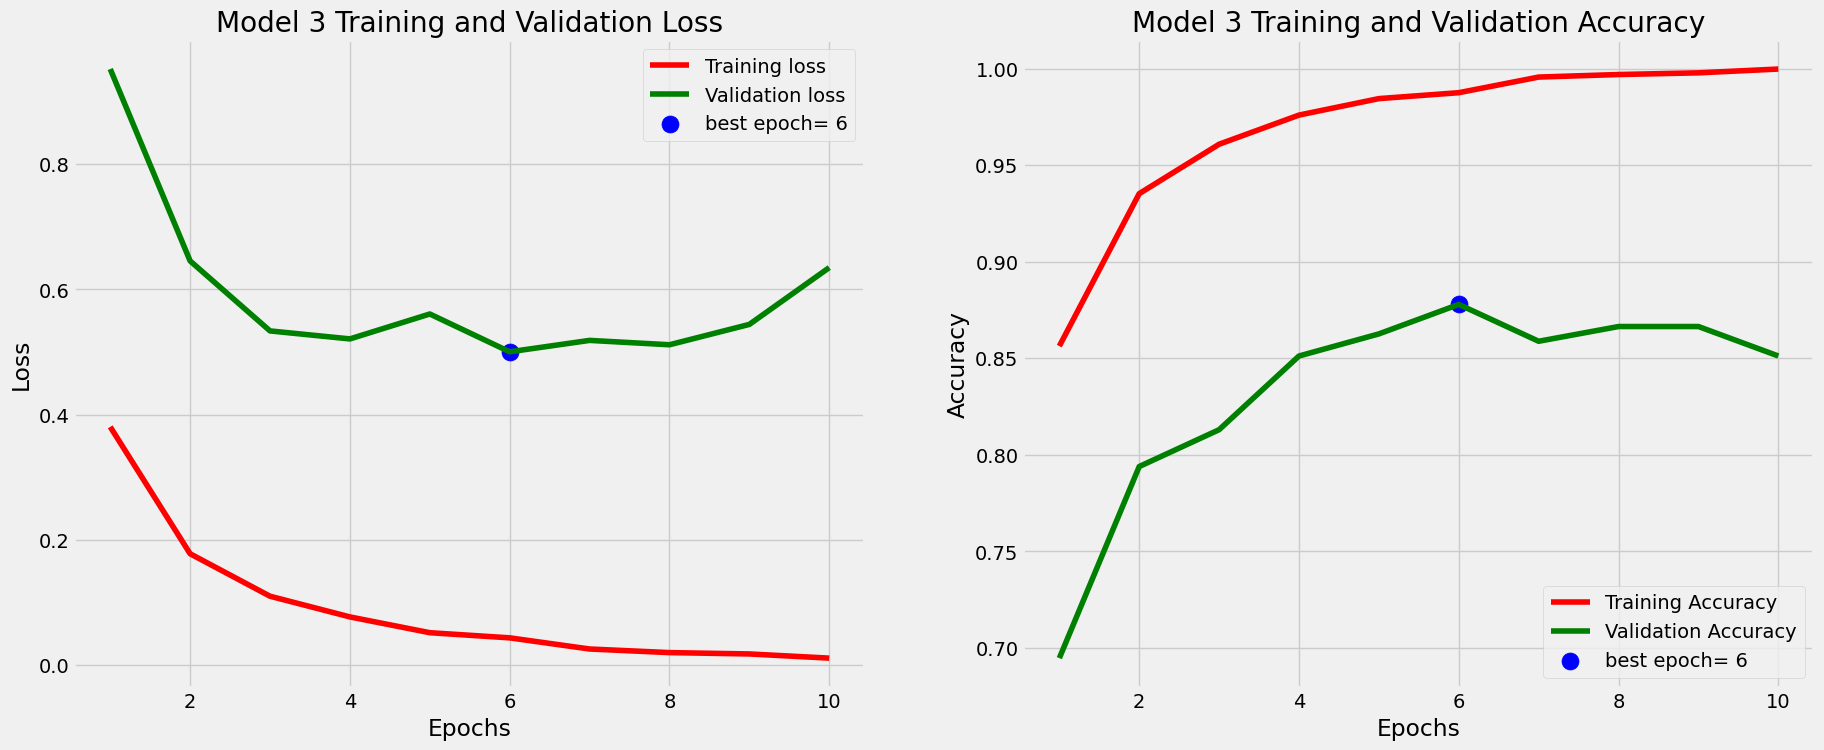

In [ ]:
# prompt: graph code for model 3

import matplotlib.pyplot as plt
import numpy as np
# Define needed variables for model3
tr_acc3 = history3.history['accuracy']
tr_loss3 = history3.history['loss']
val_acc3 = history3.history['val_accuracy']
val_loss3 = history3.history['val_loss']
index_loss3 = np.argmin(val_loss3)
val_lowest3 = val_loss3[index_loss3]
index_acc3 = np.argmax(val_acc3)
acc_highest3 = val_acc3[index_acc3]

Epochs3 = [i+1 for i in range(len(tr_acc3))]
loss_label3 = f'best epoch= {str(index_loss3 + 1)}'
acc_label3 = f'best epoch= {str(index_acc3 + 1)}'

# Plot training history for model3
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs3, tr_loss3, 'r', label= 'Training loss')
plt.plot(Epochs3, val_loss3, 'g', label= 'Validation loss')
plt.scatter(index_loss3 + 1, val_lowest3, s= 150, c= 'blue', label= loss_label3)
plt.title('Model 3 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs3, tr_acc3, 'r', label= 'Training Accuracy')
plt.plot(Epochs3, val_acc3, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc3 + 1 , acc_highest3, s= 150, c= 'blue', label= acc_label3)
plt.title('Model 3 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()